In [769]:
import pandas as pd
import numpy as np

import random

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
import gc
import utils 

plt.style.use('ggplot')
%matplotlib inline

In [770]:
# data.loc[data.ap_hi==130].ap_lo.value_counts()

In [866]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

# train = utils.clean_data(train)
# test = utils.clean_data(test)

train = clean2(train)
test = clean2(test)

# train = utils.new_features(train)
# test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

In [ ]:
loo = pd.read_csv('loo_my.csv', header=None, sep=';')
d = X_train.copy()
d['cardio']=y_train
d['predict']=loo

In [809]:
# loss = d[['cardio', 'predict']].apply(lambda x: log_loss([x['cardio']], [x['predict']], labels=[0, 1]), axis=1)

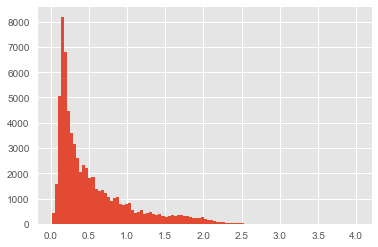

In [810]:
loss.loc[d['predict']>=0].hist(bins=100)

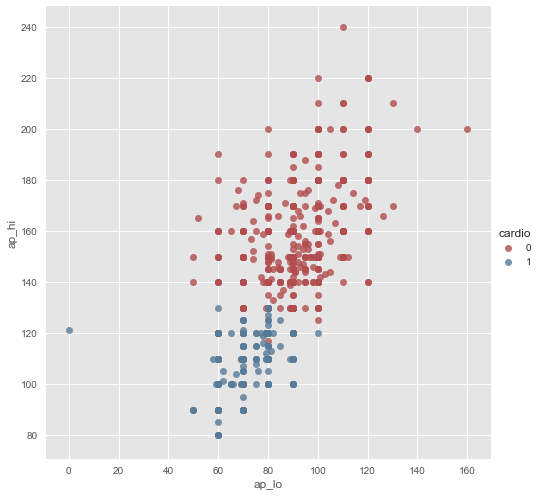

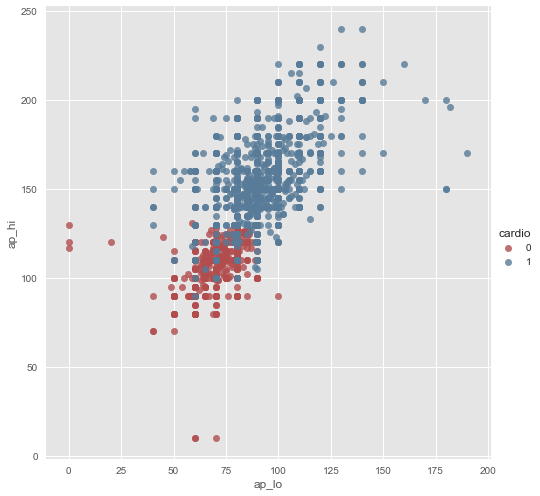

In [825]:
# (d['predict']>=0)&(loss>1.5)
sns.lmplot(x='ap_lo', y='ap_hi', data=d.loc[(d['predict']>=0)&(loss>1.5)], hue='cardio', fit_reg=False, size=7, palette=sns.color_palette("Set1", n_colors=20, desat=.5))

sns.lmplot(x='ap_lo', y='ap_hi', data=d.loc[(d['predict']>=0)&(loss<0.3)], hue='cardio', fit_reg=False, size=7, palette=sns.color_palette("Set1", n_colors=20, desat=.5))
# sns.lmplot(x='BMI', y='MAP', data=d.loc[(d['predict']>=0)&(loss>0.7)], hue='cardio', fit_reg=False, size=13, palette=sns.color_palette("Set1", n_colors=20, desat=.5))

In [827]:
d.loc[(d['predict']>=0)&(loss>1.5)&(d['cardio']==1)].iloc[:100, :20]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,smoke_fair,alco_fair,active_fair,smoke_restored,alco_restored,active_restored,error_group,BMI
41,56,18274,1,178,68.0,110,80,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0,21.461937
107,142,14499,2,164,48.0,110,70,1,2,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0,17.846520
109,144,16066,1,157,51.0,100,70,2,1,0,0,1,0.0,NaN,1.0,0.0,0.0,1.0,0,20.690495
158,213,16028,1,157,69.0,120,80,1,1,0,1,1,0.0,1.0,1.0,0.0,1.0,1.0,0,27.993022
159,215,17939,1,154,67.0,110,70,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0,28.250970
211,290,18347,1,159,57.0,125,70,1,1,0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0,22.546576
227,312,14373,1,168,68.0,120,79,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0,24.092971
352,490,15253,2,175,85.0,120,80,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0,27.755102
375,528,15383,2,170,69.0,120,80,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,23.875433
514,739,16943,2,169,75.0,120,80,1,1,1,0,1,1.0,0.0,1.0,1.0,0.0,1.0,0,26.259585


In [867]:
test['cardio']=-5
data = pd.concat((train, test), axis=0)
data['age']/=365.25

In [868]:
broken = data.loc[(data['error_group']!=0)|(data['ap_hi']-data['ap_lo']<10), ["id","age",
"gender",
"height","weight",
"ap_hi",
"ap_lo",
"cholesterol",
"gluc",
"smoke",
"alco",
"active",
                                                                    "cardio",]]

In [578]:
# broken.to_csv('broken.csv', index=False, sep=',')

In [579]:
# broken.ap_hi.value_counts()

In [774]:
# broken

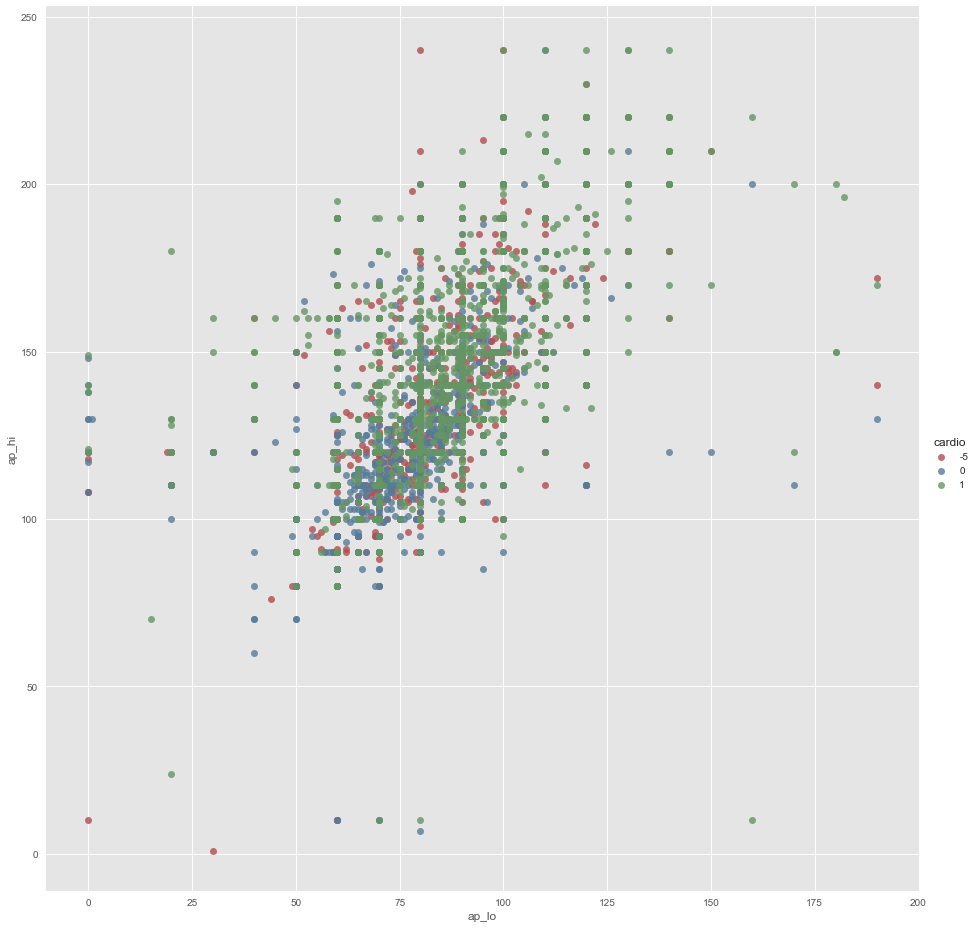

In [776]:
sns.lmplot(x='ap_lo', y='ap_hi', data=data, hue='cardio', fit_reg=False, size=13, palette=sns.color_palette("Set1", n_colors=20, desat=.5))

In [870]:
broken.loc[(broken.ap_lo<50)|(broken.ap_hi<50)]
# 138
# 149
# 148
# 108
# 117
# 118

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2612,3683,64.188912,1,170,64.0,10,70,1,1,0.0,0.0,1.0,1
5382,7657,58.151951,1,162,69.0,7,80,1,1,0.0,0.0,1.0,0
13489,19258,40.971937,2,150,60.0,130,0,1,1,0.0,0.0,0.0,0
16459,23512,56.008214,1,156,50.0,138,0,3,1,0.0,0.0,1.0,1
17381,24837,49.900068,1,164,78.0,138,0,1,1,0.0,0.0,1.0,0
20886,29827,53.451061,1,155,55.0,10,60,1,1,0.0,0.0,0.0,0
22923,32749,57.993155,2,166,68.0,149,0,1,1,0.0,0.0,1.0,1
25454,36325,49.149897,2,176,73.0,120,0,1,1,0.0,0.0,1.0,0
27686,39577,64.054757,2,180,73.0,140,0,1,1,1.0,1.0,1.0,1
29170,41674,41.889117,1,155,52.0,10,70,1,1,0.0,0.0,1.0,0


In [584]:
pd.set_option('display.height', 1500)
pd.set_option('display.max_rows', 1500)

height has been deprecated.



In [721]:
# data.loc[(data.ap_lo==80)&(data.ap_hi==100)]

In [871]:
def clean2(data):
    # weight/height correction
    idx = (data['height'] < 130) & (data['weight'] > 150)
    data.loc[idx, ["height", "weight"]] = data.loc[idx, ["weight", "height"]].values

    # preasure correction
    data.loc[data["ap_hi"] < 0, "ap_hi"] *= -1
    data.loc[data["ap_lo"] < 0, "ap_lo"] *= -1


    data.loc[(data["ap_hi"] < 20) & (data["ap_hi"] > 10), "ap_hi"] *= 10
    data.loc[(data["ap_lo"] < 15) & (data["ap_lo"] > 2), "ap_lo"] *= 10

    idx = data['ap_hi'] > 10000
    data.loc[idx, 'ap_hi'] = 10 * (data.loc[idx, 'ap_hi'] // 1000)
    data.loc[data['ap_lo'] >= 10000, 'ap_lo'] //= 100
    
    data.loc[data['ap_lo'] == 1000, 'ap_lo'] = 100
    data.loc[data['ap_lo'] == 1200, 'ap_lo'] = 120
    data.loc[data['ap_lo'] == 1001, 'ap_lo'] = 100
    data.loc[data['ap_lo'] == 1120, 'ap_lo'] = 120
    data.loc[data['ap_lo'] == 1110, 'ap_lo'] = 110
    
    idx = (data['ap_lo'] == 1100) & (data['ap_hi'] < 100)
    data.loc[idx, 'ap_lo'] = data.loc[idx, 'ap_hi']
    data.loc[idx, 'ap_hi'] = 110
    
    data.loc[data['ap_lo'] == 1100, 'ap_lo'] = 100 # not sure...
    
    # ...
    idx = (data['ap_hi'] - data['ap_lo'] < -10) & (data['ap_lo'] < 190) & (data['ap_hi'] > 30) & (data['ap_hi'] <= 100)
    data.loc[idx, ['ap_hi', 'ap_lo']]=data.loc[idx, ['ap_lo', 'ap_hi']].values
    
    data.loc[data['ap_hi'] == 20, 'ap_hi'] = 120
    
    data.loc[data['ap_lo'].isin([800,
                                     8044,
                                     80,
                                     802,
                                     8000,
                                     8099,
                                     8079,
                                     809,
                                     801,
                                     810,
                                     8200,
                                     820,
                                     880,
                                     808,
                                     8022,
                                    ]), 'ap_lo'] = 80
    
    data.loc[data['ap_lo'] == 1900, 'ap_lo'] = 90
    
    data.loc[data['ap_lo'] == 1130, 'ap_lo'] = 130
    data.loc[data['ap_lo'] == 1300, 'ap_lo'] = 130
    
    data.loc[data['ap_lo'] == 1140, 'ap_lo'] = 140
    data.loc[data['ap_lo'] == 1400, 'ap_lo'] = 140
    
    data.loc[data['ap_lo'] > 1000, 'ap_lo'] //= 10
    data.loc[data['ap_lo'] > 890, 'ap_lo'] = 90
    data.loc[data['ap_lo'] > 790, 'ap_lo'] = 80
    data.loc[data['ap_lo'] > 690, 'ap_lo'] = 70
    
    data.loc[data['ap_lo'] == 585, 'ap_lo'] = 85
    data.loc[data['ap_lo'] == 602, 'ap_lo'] = 60
    data.loc[data['ap_lo'] == 570, 'ap_lo'] = 70
    
    idx = data['ap_hi'] // 100 == 11
    data.loc[idx, 'ap_hi'] = data.loc[idx, 'ap_hi'] % 1000
    data.loc[data['ap_hi'] >= 1000, 'ap_hi'] //= 10
    
    data.loc[data['ap_hi'] == 138, ['ap_hi', 'ap_lo']] = [130, 80]
    data.loc[data['ap_hi'] == 149, ['ap_hi', 'ap_lo']] = [140, 90]
    data.loc[data['ap_hi'] == 148, ['ap_hi', 'ap_lo']] = [140, 80]
    data.loc[data['ap_hi'] == 108, ['ap_hi', 'ap_lo']] = [100, 80]
    data.loc[data['ap_hi'] == 117, ['ap_hi', 'ap_lo']] = [110, 70]
    data.loc[data['ap_hi'] == 118, ['ap_hi', 'ap_lo']] = [110, 80]
    
#     data.loc[data["ap_hi"] > 1000, "ap_hi"] //= 10
#     idx = (data['ap_hi'] - data['ap_lo'] < -10) & (data['ap_lo'] < 250) & (data['ap_hi'] > 30)
#     data.loc[idx, ['ap_lo']]=data.loc[idx, ['ap_lo']]%100
    
    manual_update = [
# 20438	50.324435	1	160	70.0	160	7100	1	1	0.0	1.0	1.0	1
# 29821	52.350445	1	155	81.0	160	8100	1	1	0.0	0.0	1.0	1
# 47030	50.198494	1	156	65.0	150	9011	2	2	0.0	0.0	1.0	1
# 59157	49.765914	1	161	60.0	150	7099	1	1	0.0	0.0	1.0	1
# 10586	47.767283	1	160	75.0	170	4100	1	1	0.0	0.0	1.0	-5
# 50848	61.223819	1	158	59.0	180	8100	1	2	0.0	NaN	1.0	-5
# 63276	58.291581	1	162	69.0	160	9100	1	1	0.0	0.0	1.0	-5
        
(20438, ['ap_lo'], [70]),
(29821, ['ap_lo'], [80]),
(47030, ['ap_lo'], [90]),
(59157, ['ap_lo'], [70]),
(10586, ['ap_lo'], [100]),
(50848, ['ap_lo'], [80]),
(63276, ['ap_lo'], [90]),
        
        
# WORSE vvvvv
# 9482	53.464750	1	162	69.0	130	9100	1	1	0.0	0.0	1.0	1
# 17260	58.770705	2	169	78.0	130	9011	1	1	1.0	1.0	1.0	1
# 22832	39.720739	2	179	70.0	120	8500	1	1	0.0	0.0	1.0	0
# 33191	54.570842	2	170	70.0	112	5700	1	2	0.0	0.0	1.0	1
# 62058	59.975359	2	179	62.0	130	9800	1	1	0.0	0.0	1.0	0
# 75482	55.854894	1	164	70.0	125	6800	1	1	0.0	0.0	1.0	0
# 90139	53.314168	1	159	61.0	110	8077	1	1	0.0	0.0	1.0	0
# 95886	50.565366	2	165	68.0	113	5700	1	1	0.0	0.0	1.0	0
# 26985	52.062971	1	151	74.0	125	9100	1	1	NaN	0.0	1.0	-5
# 45450	49.623546	1	170	86.0	125	4700	2	1	0.0	0.0	1.0	-5
# 74784	57.993155	1	165	65.0	120	8100	3	3	NaN	0.0	0.0	-5
(9482, ['ap_lo'], [90]),
(17260, ['ap_lo'], [90]),
(22832, ['ap_lo'], [80]),
(33191, ['ap_lo'], [70]),
(62058, ['ap_lo'], [80]),
(75482, ['ap_lo'], [80]),
(90139, ['ap_lo'], [80]),
(95886, ['ap_lo'], [70]),
(26985, ['ap_lo'], [90]),
(45450, ['ap_lo'], [70]),
(74784, ['ap_lo'], [80]),
        
# 12494	46.283368	2	163	63.0	1	2088	1	1	1.0	0.0	1.0	0
# 60477	51.241615	1	171	80.0	1	1088	1	1	0.0	0.0	1.0	1
# 6580	52.235455	1	176	92.0	1	1099	1	1	0.0	NaN	1.0	-5
# 51749	50.428474	1	169	62.0	1	2088	1	1	0.0	0.0	1.0	-5
        
        (12494, ['ap_hi', 'ap_lo'], [120, 80]),
        (60477, ['ap_hi', 'ap_lo'], [110, 80]),  
        (6580, ['ap_hi', 'ap_lo'], [110, 90]),
        (51749, ['ap_hi', 'ap_lo'], [120, 80]),
# 2654	41.385352	1	160	60.0	902	60	1	1	0.0	0.0	1.0	0
# 6822	39.493498	1	168	63.0	909	60	2	1	0.0	0.0	1.0	0
# 13616	62.036961	1	155	87.0	701	110	1	1	0.0	0.0	1.0	1
# 57646	55.638604	1	162	50.0	309	0	1	1	0.0	0.0	1.0	0
# 58349	54.225873	1	162	67.0	401	80	1	3	0.0	0.0	1.0	1
# 59301	57.412731	1	154	41.0	806	0	1	1	0.0	0.0	1.0	0
# 77010	50.680356	1	164	54.0	960	60	1	1	0.0	0.0	1.0	0
# 1079	61.796030	2	170	74.0	400	60	1	1	0.0	0.0	1.0	-5
# 23199	49.541410	1	166	64.0	957	70	1	1	NaN	0.0	0.0	-5
# 62837	54.516085	2	170	79.0	509	0	1	1	0.0	0.0	1.0	-5
        
(2654, ['ap_hi', 'ap_lo'], [90, 60]),
(6822, ['ap_hi', 'ap_lo'], [90, 60]),
(13616, ['ap_hi', 'ap_lo'], [170, 110]),
(57646, ['ap_hi', 'ap_lo'], [130, 980]),
(58349, ['ap_hi', 'ap_lo'], [140, 80]),
(59301, ['ap_hi', 'ap_lo'], [80, 60]),
(77010, ['ap_hi', 'ap_lo'], [90, 60]),
(1079, ['ap_hi', 'ap_lo'], [100, 60]),
(23199, ['ap_hi', 'ap_lo'], [95, 70]),
(62837, ['ap_hi', 'ap_lo'], [150, 90]),
        
# 57646	55.638604	1	162	50.0	130	980	1	1	0.0	0.0	1.0	0
        (57646, ['ap_lo'], [80]),
    ]
    for idx, cols, update in manual_update:
        data.loc[data['id'] == idx, cols] = update
    
    #################
    
#     data.loc[(data['ap_lo']==30), 'ap_lo'] = 80
    
    data.loc[(data['ap_hi']==906), ['ap_hi', 'ap_lo']] = [90, 60]
    data.loc[(data['ap_hi']==907), ['ap_hi', 'ap_lo']] = [90, 70]
#     data.loc[(data['ap_hi']==806), ['ap_hi', 'ap_lo']] = [80, 60]
#     data.loc[(data['ap_hi']==309), ['ap_hi', 'ap_lo']] = [130, 90]
    data['error_group'] = 0
    data.loc[(data['ap_lo'] < 20), 'error_group'] = 5
    data.loc[(data['ap_hi'] < 50), 'error_group'] = 6
    data.loc[(data['ap_lo'] > 250), 'error_group'] = 1
    data.loc[(data['ap_lo'] > 4000), 'error_group'] = 2
    data.loc[(data['ap_hi'] > 250), 'error_group'] = 3
    data.loc[(data['ap_hi'] > 10000), 'error_group'] = 4
    return data

In [872]:
loo = pd.read_csv('LOO_results.csv', sep=',', index_col='index')
loo = loo.sort_index()
strat = pd.qcut(loo, 20, labels=False).astype(str)
strat = np.hstack((strat, y_train.reshape((-1,1))))
strat =np.apply_along_axis(lambda d: str(d[0]) + '_' + str(d[1]), 1, strat)

In [873]:
# pd.Series(strat).value_counts()

In [874]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = clean2(train)
test = clean2(test)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

In [875]:
use_columns = [
"age_group",
"gender",
"height",
"weight",
"ap_hi",
"ap_lo",
"cholesterol",
"gluc",
"smoke_restored",
"alco_restored",
"active_restored",
# "error_group",
"BMI",
"ap_dif",
"MAP",
"age_group_MAPX",
]
mean_columns = [
#     ['cholesterol','gluc','smoke_restored','active_restored'],
#     ['ap_hi_group'],
#     ['ap_lo_group'],
#     ['ap_hi_group', 'age_group'],
# #     ["error_group"],
#     ['gluc'], 
#     ['MAP','active_restored'],
#     ['gender','MAP'], 
#     ['cholesterol','gluc'],
#     ['gluc','smoke_restored'],
#     ['gluc','active_restored'],
#     ['gluc','alco_restored'],
#     ['smoke_restored','active_restored'],
#     ['cholesterol','gluc','active_restored'],
#     ['gender','cholesterol','gluc']
    
    
#  ('age_group', 'gender', 'gluc', 'smoke', 'active'),
#  ('gender', 'cholesterol', 'gluc', 'alco', 'active'),
#  ('MAP', 'alco', 'active', 'ap_hi_group', 'ap_lo_group'),

]

# for i in range(10):
#         str_i = str(i)
#         use_columns.append('hi_' + str_i + 's')

In [877]:
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'n_estimators': 224,
    'subsample': 0.8,
    
    'n_jobs': 4,
    'random_state': 2707,
    'silent': True,
}

utils.execute_model(xgb.XGBClassifier(**params),
              X_train,
              y_train,
#               X_test,
#               model_name="model1+",
               mean_columns = mean_columns,
              use_columns = use_columns,
#               n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              alpha=13,
#                     verbose=0
             )
gc.collect()
# mean: 0.538285252534

# mean: 0.538269625709
# mean: 0.538236304885

# 0.538165802596
#  0.538044372182

# 0.538068044607
# 0.538046718451  0.538141127156
# 0.538164179021 110
# mean: 0.538159507547 105
# 0.538133633182 100

# mean: 0.538030554975
# mean: 0.538058542246
# mean: 0.538042794907

# mean: 0.538169316987
# 0.538115082189

# 0.538015868136

# mean: 0.538130995063
# mean: 0.538016211504

# mean: 0.538017046973

# mean: 0.538014096544
# 0.53799148135
# 0.538086890907

# mean: 0.538881035549
# std: 0.00142658306865


5 folds logloss:
[0.53799372547395652, 0.53985413901085988, 0.53991788513450134, 0.53929498529997877, 0.53878468290151293]
mean: 0.539169083564
std: 0.000717647059986


487

In [858]:
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'n_estimators': 200,
    'subsample': 0.8,
    'tree_method': 'hist',
    'grow_policy': 'lossguide',
    
    'n_jobs': 4,
    'random_state': 2707,
    'silent': True,
}

utils.execute_model(xgb.XGBClassifier(**params),
              X_train,
              y_train,
              X_test,
              model_name="model2+",
              mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              alpha=13,
             )
gc.collect()


10 folds logloss:
[0.5380582793220845, 0.53746193238375595, 0.5380768019509059, 0.53942377862260216, 0.54136216224345923, 0.53820236633396712, 0.53707361956396515, 0.53930074476139955, 0.53715601652072631, 0.53896734759519971]
mean: 0.53850830493
std: 0.00123634511939
15 Splits logloss:
[0.53828143158254482, 0.53856161749265408, 0.53877093752289451, 0.53897303689882647, 0.53737024125844113, 0.53842749064148798, 0.53813293765568027, 0.53866745842860075, 0.53865220604383213, 0.53931226256995957, 0.537998754749615, 0.53775501617652632, 0.53907999293604869, 0.53888715996043857, 0.53887557750784576]
mean: 0.538516408095
std: 0.000510269145367
model2+ results saved!


456

In [859]:
import lightgbm as lgb

params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'n_estimators': 44,
    'subsample': 0.8,
       
    'nthread': 4,
    'seed': 2707,
    'silent': True,
}

utils.execute_model(lgb.LGBMClassifier(**params),
              X_train,
              y_train,
              X_test,
              model_name="model3+",
              mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              alpha=13
             )
gc.collect()


10 folds logloss:
[0.53781409351860054, 0.53854394797648331, 0.53824166818052643, 0.53941103729708295, 0.54245066099190409, 0.53844785091287128, 0.53753333832095218, 0.54097984574327118, 0.53838739615183062, 0.53797052729560257]
mean: 0.538978036639
std: 0.00148564684948
15 Splits logloss:
[0.53895120644638694, 0.53922973017393139, 0.53873221223712464, 0.5389391482643332, 0.53841633584233894, 0.53936800926767947, 0.53768135605325729, 0.53955672653240583, 0.53871029386836, 0.53962400019225742, 0.53830511291923766, 0.53885964466190772, 0.5388436799392361, 0.5393622315247889, 0.53895713480328444]
mean: 0.538902454848
std: 0.000493022225144
model3+ results saved!


103

In [860]:
clf = xgb.XGBClassifier(
        learning_rate=0.06,
        n_estimators=335,
        max_depth=5,
        min_child_weight=5,
        gamma=0.3,
        subsample=0.5,
        colsample_bytree=0.5,
        reg_alpha=9,
        reg_lambda=1.4,
        nthread=4,
       
        seed=1111
    )

utils.execute_model(clf,
              X_train,
              y_train,
              X_test,
              model_name="model4+",
               mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              alpha=13,
             )
gc.collect()


10 folds logloss:
[0.53763289553809723, 0.53677621376049967, 0.53953624662772337, 0.53905891221252911, 0.54297221760773384, 0.53735492059048773, 0.53781604264788452, 0.538806472634491, 0.53897059453317075, 0.53865136965384686]
mean: 0.538757588581
std: 0.00162984700571
15 Splits logloss:
[0.53863660325931007, 0.53918193241692236, 0.53867226058509288, 0.53856250206980905, 0.53816925946553573, 0.53885972484086575, 0.53807638468079433, 0.53937073823431625, 0.53829254090206247, 0.53935333669369145, 0.5380886532479926, 0.53803785877692045, 0.53897674696748454, 0.53934573903664684, 0.5394161288834648]
mean: 0.538736027337
std: 0.000502919673778
model4+ results saved!


456

In [861]:
clf = xgb.XGBClassifier(
        learning_rate=0.07,
        n_estimators=218,
        max_depth=3,
        min_child_weight=5,
        gamma=0.2,
        subsample=0.6,
        colsample_bytree=0.55,
        reg_alpha=0,
        reg_lambda=1.0,
        nthread=4,
        tree_method='hist',
        grow_policy='lossguide',
       
        seed=2222
    )

utils.execute_model(clf,
              X_train,
              y_train,
              X_test,
              model_name="model5+",
               mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              alpha=13,
             )
gc.collect()


10 folds logloss:
[0.53731002409101858, 0.53729532336707464, 0.53802371324977083, 0.53875449147516086, 0.54156359575744539, 0.53808359497194846, 0.53737477143958146, 0.53955121536163231, 0.53760752921147459, 0.53884155490314922]
mean: 0.538440581383
std: 0.00126360463496
15 Splits logloss:
[0.53849454132314123, 0.53828670868358885, 0.5387144554891341, 0.53850547027844264, 0.53765176071019549, 0.53810234681496616, 0.53796422315429993, 0.53864215852208408, 0.53850342673229412, 0.5391361045026769, 0.53785814676932009, 0.53782884384113971, 0.53871671402186461, 0.53859669259191001, 0.5387826652025629]
mean: 0.538385617243
std: 0.000406897000808
model5+ results saved!


456

In [862]:
clf = lgb.LGBMClassifier(
        learning_rate=0.07,
        n_estimators=218,
#         max_depth=3,
        num_leaves=2**3,
        min_child_weight=5,
        subsample=0.6,
        colsample_bytree=0.55,
        reg_alpha=0,
        reg_lambda=1.0,
        nthread=4,
       
        seed=2222
    )

utils.execute_model(clf,
              X_train,
              y_train,
              X_test,
              model_name="model6+",
               mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
              stratification_groups=strat,
              alpha=13,
             )
gc.collect()


10 folds logloss:
[0.53683687612212816, 0.53812478317802326, 0.53901450310419363, 0.53941885882608998, 0.5421599679478275, 0.53856890233905219, 0.53712969561744595, 0.53976715370474238, 0.53769488294623158, 0.53912738091596235]
mean: 0.53878430047
std: 0.0014537146184
15 Splits logloss:
[0.53870637200992599, 0.53864700605318183, 0.5390248760303703, 0.53911476747463516, 0.5380941577581515, 0.53869532237902329, 0.53811842513896324, 0.5389691015512782, 0.53865063323228135, 0.53969186365659372, 0.53808839261366703, 0.53795941961742277, 0.53931759102894772, 0.53952138449337106, 0.539213079844024]
mean: 0.538787492859
std: 0.000527346040434
model6+ results saved!


103

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler  

# scaler = StandardScaler()  
# X = pd.concat((X_train, X_test), axis=0)
# scaler.fit(X)
# gc.collect()

# clf = MLPClassifier(solver='adam', activation='relu', learning_rate = 'adaptive', tol = 1e-5,
#                     hidden_layer_sizes=(8, 3), random_state=1100)

# utils.execute_model(clf,
#               scaler.transform(X_train),
#               y_train,
#               scaler.transform(X_test) ,
#               model_name="model4",
#               mean_columns = mean_columns,
#               use_columns = use_columns,
#               n_splits=15,
#               n_folds=10,
#               alpha=20
#              )
# gc.collect()

In [7]:
models = ['model1','model2','model3']
result1 = utils.merge_models(models, method='mean')
pd.DataFrame(result1).to_csv('models1234_mean.csv', index=False, header=False, sep=';')


model1
0.538060207945	0.539107161719	0.538060207945	0.539107161719

model2
0.538110523856	0.539099808264	0.537938368108	0.538923830216

model3
0.538584237413	0.539179527578	0.537753308853	0.538540027634


In [863]:
models = ['model1+','model2+','model3+','model4+','model5+','model6+']
result1 = utils.merge_models(models, method='mean')
pd.DataFrame(result1).to_csv('models1234_mean.csv', index=False, header=False, sep=';')
# 0.537888791163	0.53818930228	0.537494736443	0.537712095482


model1+
0.538697215978	0.539096213438	0.538697215978	0.539096213438

model2+
0.538508220253	0.538885321637	0.538492419513	0.538858058349

model3+
0.538977898922	0.538863610292	0.538242196326	0.538386702399

model4+
0.53875732611	0.538823074802	0.538092747285	0.538186541858

model5+
0.538440241174	0.538890281568	0.538046841904	0.538204610474

model6+
0.538784046364	0.538805500471	0.538089004712	0.538211005648


In [37]:
# 0.538157706723	0.538186899005 = 0.5430039 # без стасо-колонок
# 0.537450021945	0.537849282831 = 0.5434434
# 0.537513993512	0.537749328355 = 0.5433418

# 0.537662820586	0.538506869394 = 0.5433681
# 0.537639730851	0.538322959718 = 0.5436416 # overfit due to smoke leak
# 0.537723242359	0.538418956272 = 0.5433819
# 0.537697918691	0.538454608940 = 0.5435035
# 0.537797383673	0.538468964022 = 0.5433098
# 0.537998452494	0.538697384187 = 0.5433633
# 0.538141859286	0.538727942758 = 0.5434983

In [41]:
%%time
params = {
    'learning_rate': 0.1,
    'n_estimators': 50,
    
    'n_jobs': 8,
    'random_state': 2707,
    'silent': True,
}

utils.execute_model(xgb.XGBClassifier(),
              X_train,
              y_train,
              mean_columns = mean_columns,
              use_columns = use_columns,
              n_folds=10,
              alpha=13,
             )
gc.collect()


10 folds logloss:
[0.5390427398676827, 0.54365222660344015, 0.53870498418756219, 0.53608887444997255, 0.53980974928100933, 0.53472315760093947, 0.53715398042027884, 0.54153696617854841, 0.536478095614211, 0.54147770260379191]
mean: 0.538866847681
std: 0.00267057114436
Wall time: 2min 43s


In [ ]:
# 0.537735274001	0.537762262313 = 0.5439345
# 0.538040557134	0.538014744278 = 0.5436639
# 0.5374	0.5374                 = 0.5440495
# 0.537603843701	0.537606129043 = 0.5448082

# Со столбцами Стаса альфа=20
# 0.537387582699	0.537559051543 = 0.5482682

# 0.537684932504	0.537640948053 = 0.5514443 добавил один столбик "по Стасу"
# 0.537748490027	0.537673097079 = 0.5517563 20 фолдов для подсчета среднего

# Без них
# 0.538947547578	0.538808662263 = 0.5441786
# 0.538231869380	0.538120316604 = 0.5435621